In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
with open('q3_5images_records.pkl', 'rb') as f: # stats were stored in this pkl file to make use of while generating plots
    rec = pickle.load(f)

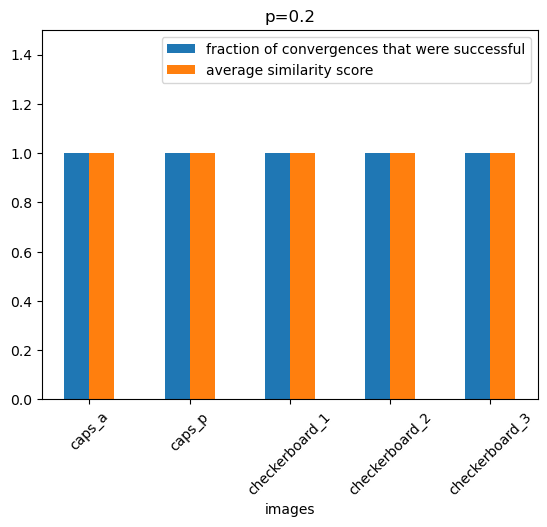

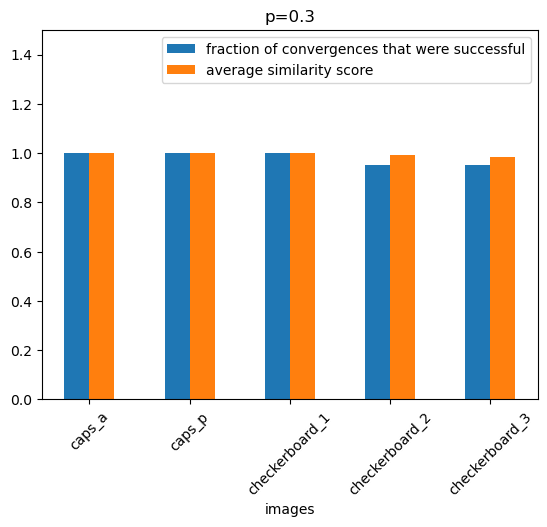

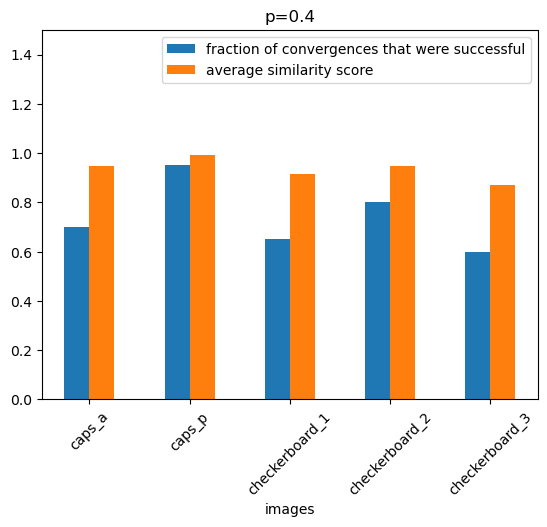

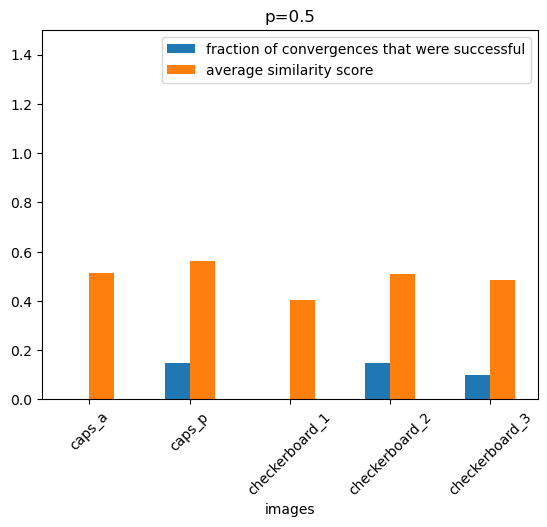

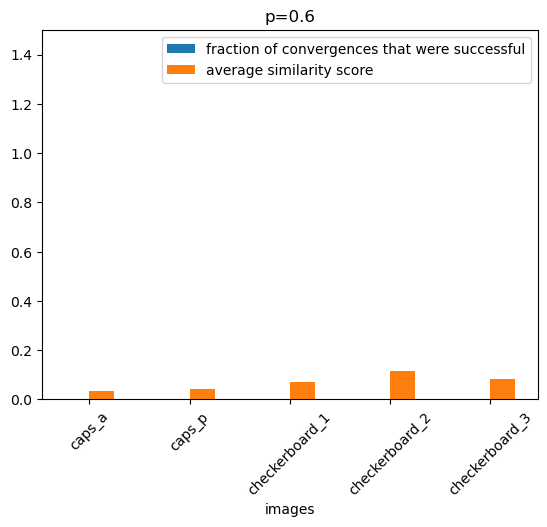

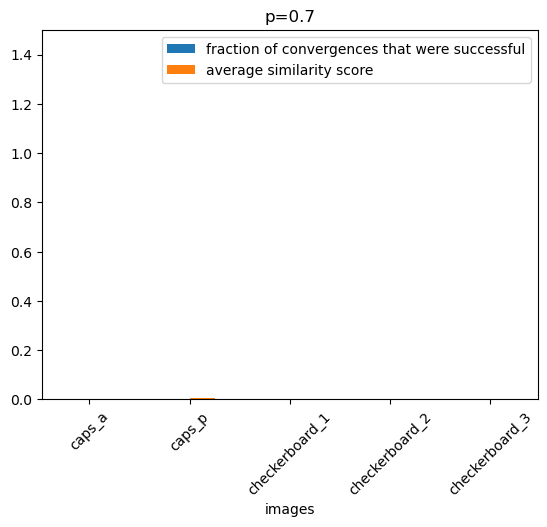

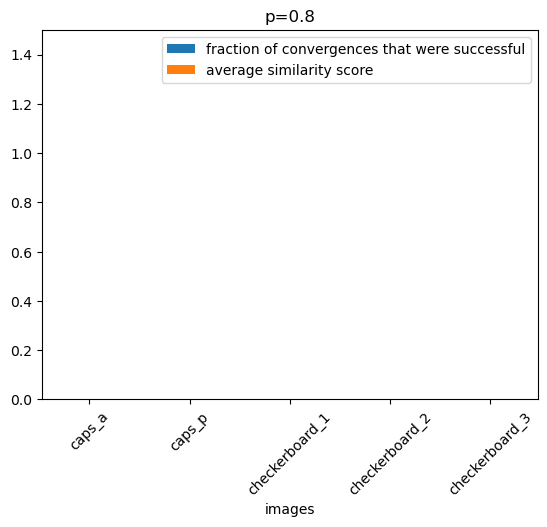

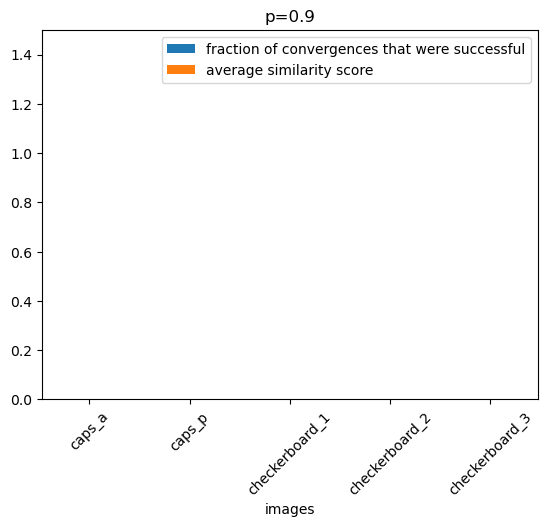

In [ ]:
def bar_plots(p):
    conv_count_list = []
    ss = []
    x_axis = ['caps_a', 'caps_p', 'checkerboard_1', 'checkerboard_2', 'checkerboard_3'] # X axis names
    for image in rec[p]['conv_count'].keys():

        #x_axis.append(image)

        conv_count_list.append(rec[p]['conv_count'][image]/20)  
        # fraction of convergences that were successful

        s = f"./q3_5images/p{p}/{image}"
        avg = 0
        for pathh in os.listdir(s):
            avg += float(pathh.split('_')[2])
        avg /= 20
        ss.append(avg)
        # similarity score

    x = np.arange(len(x_axis))

    fig, ax = plt.subplots() 
    ax.set_xlabel('images') 
    ax.set_ylim(0, 1.5)
    ax.bar(x-0.125, conv_count_list, color='tab:blue', width=0.25, label = 'fraction of convergences that were successful')
    ax.bar(x+0.125, ss, color='tab:orange', width=0.25, label = 'average similarity score')

    ax.set_xticks(x)
    ax.set_xticklabels(x_axis, rotation=45)
    ax.legend()
    plt.title(f"p={p}")
    
    plt.savefig(f"./q3stats_5images/barplots/{p}.png")
    plt.show() 
    
p_list = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for p in p_list:
    bar_plots(p)

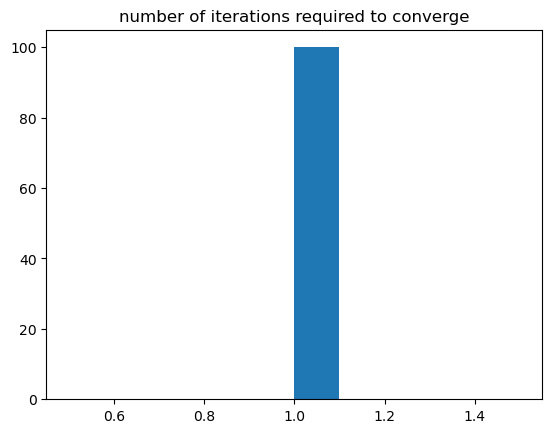

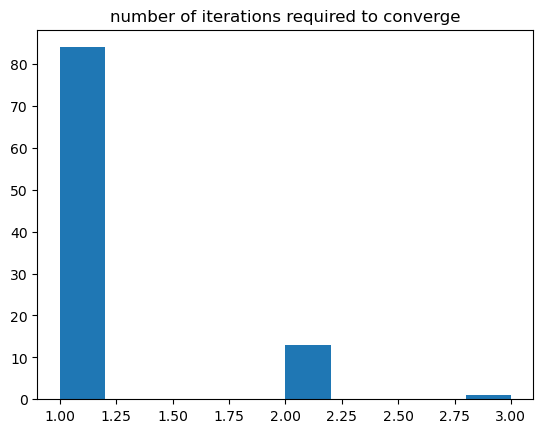

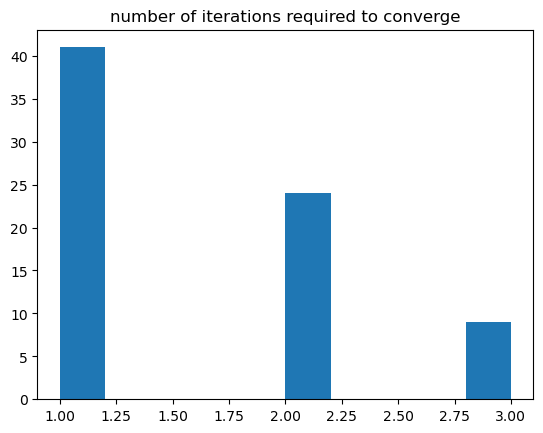

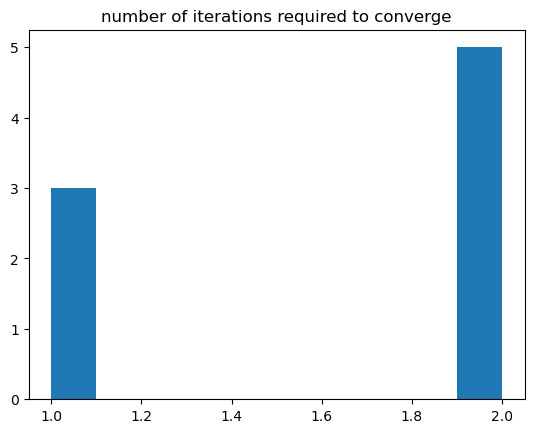

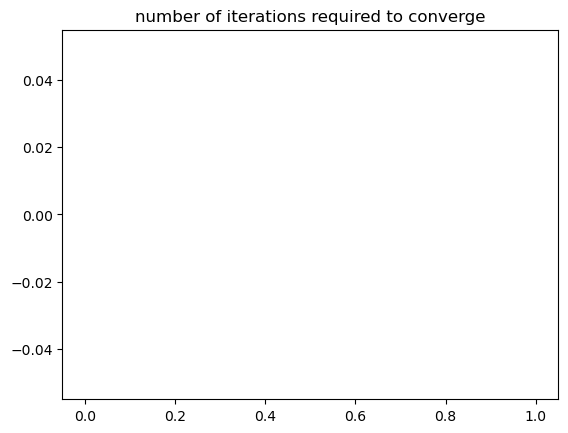

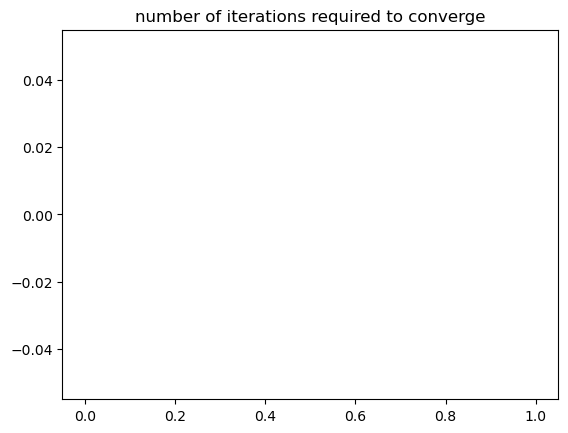

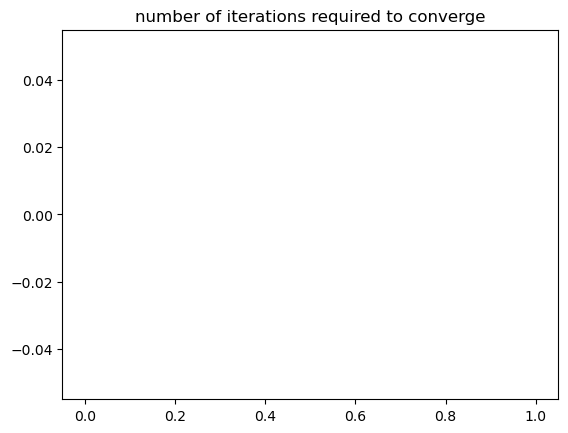

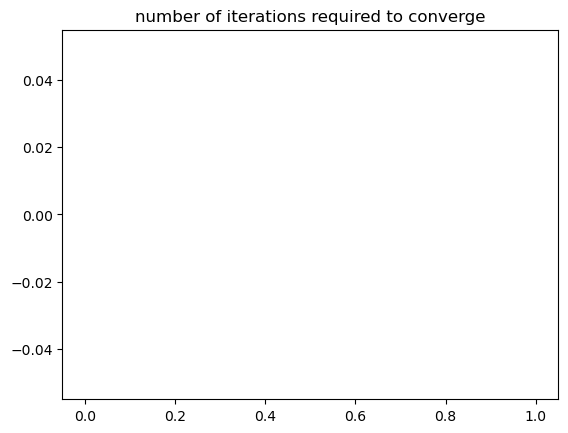

In [4]:
def histograms(p):
    
    updates = []
    for image in rec[p]['conv_update_steps'].keys():

        for a in rec[p]['conv_update_steps'][image]:
            updates.append(a)
        
    fig, ax1 = plt.subplots() 
    plt.title('number of iterations required to converge')
    plt.hist(updates)
    plt.savefig(f"./q3stats_5images/histograms/{p}.png")
    plt.show() 
    
p_list = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for p in p_list:
    histograms(p)